In [88]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv('startup_funding.csv') 
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### DATA PRE-PROCESSING

In [91]:
#DATA PRE-PROCESSING
#drop column remarks
df.drop(columns=['Remarks'],inplace=True)

In [92]:
#set sr. no to index
df.set_index('Sr No',inplace=True)

In [93]:
df.rename(columns = {
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'    
},inplace=True)

df.head(5)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3020 non-null   object
 6   round        3040 non-null   object
 7   amount       2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [95]:
# 0 means undisclosed
#fillna amount to 0

In [96]:
df['amount'] = df['amount'].fillna('0')

In [97]:
#remove the commas ,since they are strings
df['amount'] = df['amount'].str.replace(',','')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3020 non-null   object
 6   round        3040 non-null   object
 7   amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [99]:
df['amount'] = df['amount'].str.replace('undisclosed','0')

In [100]:
df['amount'] = df['amount'].str.replace('unknown','0')


In [101]:
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [102]:
df = df[df['amount'].str.isdigit()]

In [103]:
df['amount'] = df['amount'].astype('float')

In [104]:
df['amount'].dtype

dtype('float64')

In [105]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000



In [106]:
df['amount'] = df['amount'].apply(to_inr)

In [107]:
df.head(5)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [108]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [109]:
df['date'] = pd.to_datetime(df['date'],errors = 'coerce')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_26008\574569562.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'],errors = 'coerce')


In [110]:
df['date'].dt.day

Sr No
1        1.0
2       13.0
3        1.0
4        1.0
5        1.0
        ... 
3040    29.0
3041    29.0
3042    30.0
3043    30.0
3044    31.0
Name: date, Length: 3029, dtype: float64

In [111]:
#df.info()
#missing values in each column
#in some a lot , in some a few missing
#drop null values of all colummns except startup
df = df.dropna(subset = ['date','startup','vertical','city','investors','round','amount'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2822 non-null   datetime64[ns]
 1   startup      2822 non-null   object        
 2   vertical     2822 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2822 non-null   object        
 5   investors    2822 non-null   object        
 6   round        2822 non-null   object        
 7   amount       2822 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


In [113]:
df.to_csv('start_cleaned.csv',index=False)


In [122]:
#sorted(set(df['investors'].str.split(',').sum()))

#total number of unique investors present in each company or has shares in such companies
#one company can have many investors, 

In [136]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 495.000000
CureFit                  206.250000
Bizongo                  181.500000
Curefit                  123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
POPxo                     70.950000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
RentMojo                  41.250000
Aasaanjobs                41.250000
PlaySimple                33.000000
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
Little Black Book          8.250000
Cloudcherry Analytics      8.250000
Name: amount, dtype: float64

<Axes: ylabel='amount'>

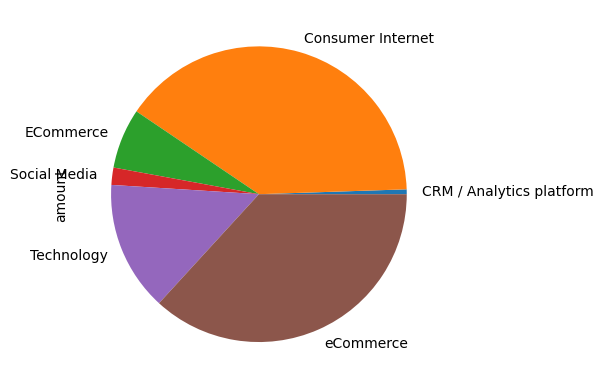

In [140]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

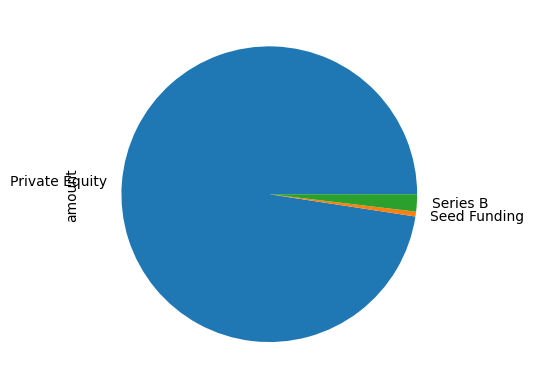

In [141]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

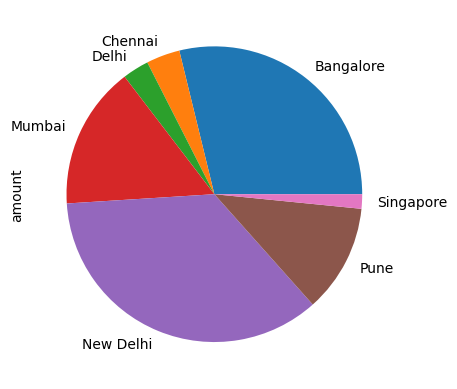

In [142]:
# different cities invested in
#in which city the investor invested the most 
df[df['investors'].str.contains(' IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')

In [143]:
#YoY investment graph
#x-axis -> year 
#y-axis -> total investment done in that year

In [145]:
df['Year'] = df['date'].dt.year

<Axes: xlabel='Year'>

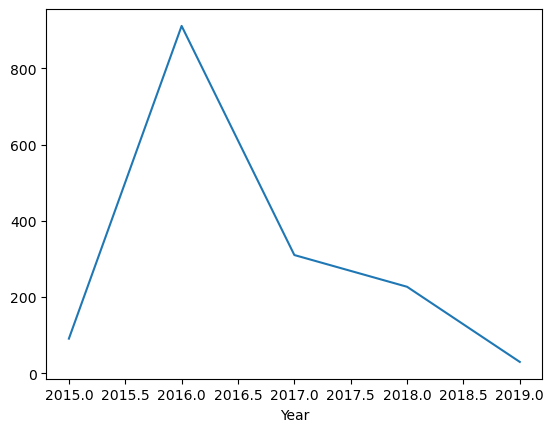

In [147]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('Year')['amount'].sum().plot()

In [149]:
round(df['amount'].sum())

296492

In [152]:
df.groupby('startup')['amount'].sum().mean()

128.96554857057416

In [150]:
df.groupby('startup')['amount'].max().sort_values(ascending=False)

startup
Rapido Bike Taxi             32175.00
Flipkart                     20625.00
Paytm                        11550.00
Flipkart.com                  5775.00
Udaan                         4826.25
                               ...   
Flochat                          0.00
Oliveboard                       0.00
SpectraVR                        0.00
Advanced Structures India        0.00
Formcept                         0.00
Name: amount, Length: 2299, dtype: float64

In [155]:
#month on month chart
# 2014 ,every month will be 1 point in x-axis

df['month'] = df['date'].dt.month

In [166]:
temp_df = df.groupby(['Year','month'])['amount'].sum().reset_index()

In [167]:
temp_df

,Year,month,amount
0,2015,1,5274.637500
1,2015,2,1567.178250
2,2015,3,1910.658750
3,2015,4,4511.058750
4,2015,5,1401.427500
...,...,...,...
58,2019,12,3667.125000
59,2020,1,140.649250
60,2020,2,39.600000
61,2020,9,1801.460595


In [168]:
temp_df['x-axis'] = temp_df['month'].astype('str') + '-' + temp_df['Year'].astype('str')

In [169]:
temp_df[['amount','x-axis']]

,amount,x-axis
0,5274.637500,1-2015
1,1567.178250,2-2015
2,1910.658750,3-2015
3,4511.058750,4-2015
4,1401.427500,5-2015
...,...,...
58,3667.125000,12-2019
59,140.649250,1-2020
60,39.600000,2-2020
61,1801.460595,9-2020


In [170]:
#Sector Analysis Pie -> top sectors(Count + Sum) 
#Type of funding
#City wise funding

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,Year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2
